In [1]:
import tkinter as tk
from tkinter import *
from tkinter import ttk
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score,r2_score
from sklearn.impute import SimpleImputer
from tkinter.filedialog import askopenfilename
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
from scipy.io import loadmat
from tkinter import filedialog
from tkinter import messagebox
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [3]:
root = Tk()
root.title('Random Forest Classifier')
root.geometry('1000x600')

''

In [4]:
def data():
    global x,arr
    x = askopenfilename(initialdir=r'C:\Users\Lenovo\Desktop\MP PROJECT',title = "Select file")
    x = loadmat(x)
    arr = []
    for i in x.keys():
        arr.append(i)
    x = x[arr[-1]]
    e1.insert(0, x)
    e1.config(text=x)
    
    return x


In [5]:
def ground_truth():
    global y1 
    y1 = askopenfilename(initialdir=r'C:\Users\Lenovo\Desktop\MP PROJECT',title = "Select file")
    y1 = loadmat(y1)
    arr1 = []
    for i in y1.keys():
        arr1.append(i)
    y1 = y1[arr1[-1]]
    e2.insert(0, y1)
    e2.config(text=y1)
    return y1

In [6]:
def load_dataset():
    global df
#     x = loadmat(x)[arr[-1]]
#     y1 = loadmat(y)[arr1[-1]]
    Label(root,text=f'shape:{x.shape}', activeforeground="white",activebackground="black").place(x=800,y=95)
    Label(root,text=f'shape:{y1.shape}', activeforeground="white",activebackground="black").place(x=800,y=115)
    q = x.reshape(-1,x.shape[2])
    df = pd.DataFrame(q)
    df=pd.concat([df,pd.DataFrame(data=y1.ravel())],axis=1)
    df.columns= [f'band{i}' for i in range(1, 1+x.shape[2])]+['class']
    Label(root,text=f'shape:{df.shape}', activeforeground="white",activebackground="black").place(x=800,y=135)
    return df

In [7]:
def save_dataset():
    global dataset
    df.to_csv(f'Dataset for {arr[-1]}.csv')
    tk.messagebox.showinfo('information',"Dataset saved successfully")
    

In [8]:
def test_size():
    global alpha
    alpha = float(e3.get())
    tk.messagebox.showinfo('information',f"Test data size chosen as : {alpha}")
    

In [9]:
def pca_plot():
    global arr3
    arr3 = []
    for i in x.shape:
        arr3.append(i)
    var1 = arr3[-1]
    pca = PCA()
    pc = pca.fit_transform(df.iloc[:,:-1].values)
    ev=pca.explained_variance_ratio_
    plt.figure(figsize=(12, 6))
    plt.plot(np.cumsum(ev))
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance')
    plt.savefig(f'Cumulative variance  for {arr[-1]}.png', dpi=300)
    tk.messagebox.showinfo('information',"Saved")
    

In [10]:
def pca_value():
    global var2
    var2 = int(e4.get())
    tk.messagebox.showinfo('information',f"{var2} principal components are selected")
    

In [11]:
def train_model():
    global model , q1 , score ,X_test , y_test
#     pca = PCA(n_components=85)
#     pc = pca.fit_transform(df.iloc[:,:-1].values)
    pca = PCA(n_components = var2)
    dt = pca.fit_transform(df.iloc[:, :-1].values)
    q1 = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y1.ravel())], axis = 1)
    q1.columns = [f'PC-{i}' for i in range(1,var2+1)]+['class']
    x1 = q1[q1['class'] != 0]

    X = x1.iloc[:, :-1].values
    y = x1.loc[:, 'class'].values

     
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=alpha, random_state=11, stratify=y)
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    tk.messagebox.showinfo('information',"Model Trained successfully")

In [12]:
def test_model():
    global y_pred
    y_pred = model.predict(X_test)
    score  = 100*accuracy_score(y_pred,y_test)
    Label(root,text=f'Accuracy Score : {score}', activeforeground="white",activebackground="black").place(x=600,y=305)

In [13]:
def Conf_Matrix():
    global cm,df_cm
    cm = confusion_matrix(y_test, y_pred)
#     names = ['Alfalfa',	'Corn-notill', 'Corn-mintill',	'Corn',		'Grass-pasture','Grass-trees',
# 'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
# 'Soybean-clean', 'Wheat',	'Woods',	'Buildings Grass Trees Drives',	'Stone Steel Towers']
#     df_cm = pd.DataFrame(cm, columns=np.unique(names), index = np.unique(names))
    df_cm = pd.DataFrame(cm)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    arr2 = []
    for i in df_cm.shape:
        arr2.append(i)
    plt.figure(figsize = (10,8))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": arr2[0]}, fmt='d')
    plt.savefig(f'cmap for {arr[-1]}.png', dpi=300)
#     df_cm = pd.DataFrame(cm)
#     df_cm.index.name = 'Actual'
#     df_cm.columns.name = 'Predicted'
    df_cm.to_csv(f'Confusion matrix for {arr[-1]}.csv')
    tk.messagebox.showinfo('information',"SUCCESS! Confusion matrix saved as image and CSV file ")

In [14]:
def exit():
    root.destroy()

In [15]:
l1=Label(root, text='Select Data File')
l1.grid(row=1, column=0)
e1 = Entry(root,text='')
e1.grid(row=1, column=2)
Button(root,text='Browse files', command=data,activeforeground="white",activebackground="black").grid(row=1, column=3)

In [16]:
l2=Label(root, text='Select Ground Truth File')
l2.grid(row=2, column=0)
e2 = Entry(root,text='')
e2.grid(row=2, column=2)
Button(root,text='Browse files', command=ground_truth,activeforeground="white",activebackground="black").grid(row=2, column=3)

In [17]:
l12 = Label(root,text ='Enter test data size (<1)')
l12.grid(row=10,column=0)
e3 = Entry(root,text='')
e3.grid(row=10,column=2)
Button(root,text='Confirm', command=test_size,activeforeground="white",activebackground="black").grid(row=10, column=3)

In [18]:
l13 = Label(root,text ='Enter no of Principal components to be selected')
l13.grid(row=8,column=0)
e4 = Entry(root,text='')
e4.grid(row=8,column=2)
Button(root,text='Apply PCA', command=pca_value,activeforeground="white",activebackground="black").grid(row=8, column=3)

In [19]:
Button(root,text='Load Dataset', command=load_dataset,activeforeground="white",activebackground="black").place(x=210, y=98)

In [20]:
Button(root,text='Save Dataset as csv', command=save_dataset,activeforeground="white",activebackground="black").grid(row=4, column=3)

In [21]:
Button(root,text='Train model', command=train_model,activeforeground="white",activebackground="black").grid(row=12, column=2)

In [22]:
Button(root,text='Generate confusion matrix', command=Conf_Matrix,activeforeground="white",activebackground="black").grid(row=16, column=2)

In [23]:
Button(root,text='Test model', command=test_model,activeforeground="white",activebackground="black").grid(row=14, column=2)

In [24]:
Button(root,text='Exit', command=exit,activeforeground="white",activebackground="black").grid(row=18, column=2)

In [25]:
Button(root,text='Generate cumulative variance plot', command=pca_plot,activeforeground="white",activebackground="black").grid(row=6, column=2)

In [26]:
l4 = Label(root,text='Random Forest Classifier for Hyperspectral Images',font=('Helvetica', 12, 'bold'))
l4.grid(row=0,column = 2)

In [27]:
l3 = Label(root,text=' ')
l3.grid(row=5,column = 2)

In [28]:
l5 = Label(root,text='  ')
l5.grid(row=7,column = 2)

In [29]:
l7 = Label(root,text='  ')
l7.grid(row=3,column = 2)

In [30]:
l9 = Label(root,text='  ')
l9.grid(row=9,column = 2)

In [31]:
l8 = Label(root,text='  ')
l8.grid(row=13,column = 2)

In [32]:
l11 = Label(root,text='  ')
l11.grid(row=11,column = 2)

In [33]:
l10 = Label(root,text='Made by Abhishek Yadav [20103008] for CE-672A ',fg="red")
l10.grid(row=20,column = 2)

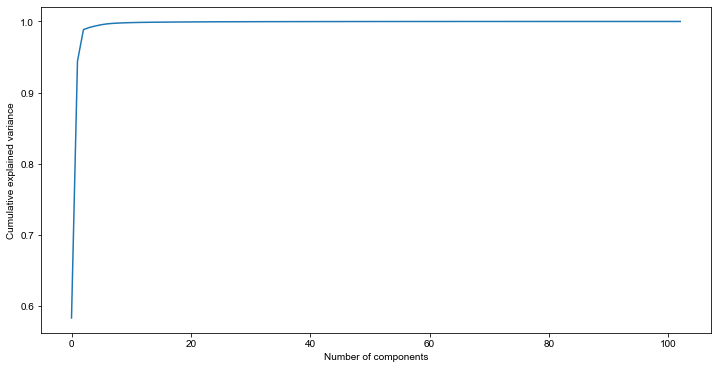

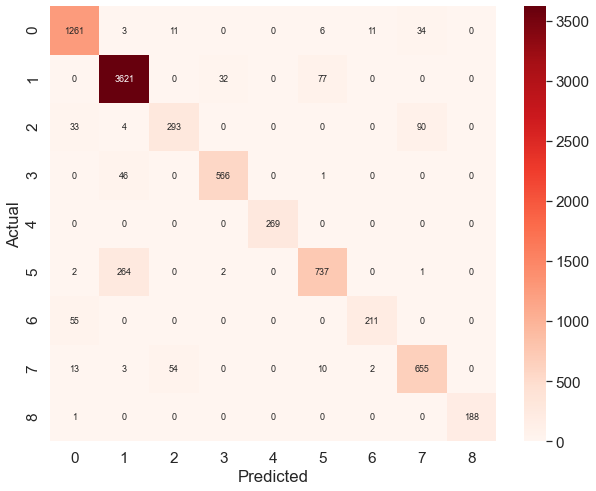

In [34]:
root.mainloop()